MNIST with CNN : Three Layer , accuracy about 98%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started.
Epoch: 0001 cost = 0.350654815
Epoch: 0002 cost = 0.091681825
Epoch: 0003 cost = 0.067732442
Epoch: 0004 cost = 0.054656122
Epoch: 0005 cost = 0.047226664
Epoch: 0006 cost = 0.041670216
Epoch: 0007 cost = 0.037016426
Epoch: 0008 cost = 0.031760057
Epoch: 0009 cost = 0.027535985
Epoch: 0010 cost = 0.025269633
Epoch: 0011 cost = 0.021968984
Epoch: 0012 cost = 0.020478905
Epoch: 0013 cost = 0.017472949
Epoch: 0014 cost = 0.015914539
Epoch: 0015 cost = 0.014644872
Finished
Accuracy: 0.9884
Label:  [9]
Prediction:  [9]


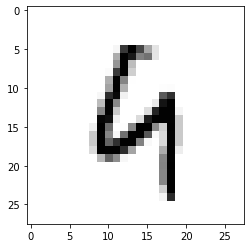

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)
tf.reset_default_graph() #변수 초기화
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X=x = tf.placeholder(tf.float32, [None, 784])
x_img = tf.reshape(x, [-1, 28, 28, 1])         # 28x28x1 (b/w)
y = tf.placeholder(tf.float32, [None, 10])

# Layer 1 ImgIn shape=(?, 28, 28, 1)
# Conv     -> (?, 28, 28, 32)
# Pool     -> (?, 14, 14, 32)
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
l1 = tf.nn.conv2d(x_img, w1, strides=[1, 1, 1, 1], padding='SAME')
l1 = tf.nn.relu(l1)
l1 = tf.nn.max_pool(l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
'''
Result:
After Conv2D:0, shape=(?, 28, 28, 32)
After Relu:0, shape=(?, 28, 28, 32)
After MaxPool:0, shape=(?, 14, 14, 32)
'''

# Layer 2 ImgIn shape=(?, 14, 14, 32)
# Conv      ->(?, 14, 14, 64)
# Pool      ->(?, 7, 7, 64)
w2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
l2 = tf.nn.conv2d(l1, w2, strides=[1, 1, 1, 1], padding='SAME')
l2 = tf.nn.relu(l2)
l2 = tf.nn.max_pool(l2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
l2_flat = tf.reshape(l2, [-1, 7 * 7 * 64])
'''
Result:
After Conv2D_1:0, shape=(?, 14, 14, 64)
After Relu_1:0, shape=(?, 14, 14, 64)
After MaxPool_1:0, shape=(?, 7, 7, 64)
After Reshape_1:0, shape=(?, 3136)
'''

# Final FC 7x7x64 inputs -> 10 outputs
w3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(l2_flat, w3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Finished')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

MNIST with CNN : Five Layer , accuracy about 99%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.439207215
Epoch: 0002 cost = 0.094184409
Epoch: 0003 cost = 0.070593817
Epoch: 0004 cost = 0.056842188
Epoch: 0005 cost = 0.049870190
Epoch: 0006 cost = 0.046439647
Epoch: 0007 cost = 0.040493444
Epoch: 0008 cost = 0.037609489
Epoch: 0009 cost = 0.036055550
Epoch: 0010 cost = 0.031183531
Epoch: 0011 cost = 0.032589947
Epoch: 0012 cost = 0.029294096
Epoch: 0013 cost = 0.027189256
Epoch: 0014 cost = 0.026475934
Epoch: 0015 cost = 0.026092656
Finished
Accuracy: 0.9939
Label:  [9]
Prediction:  [9]


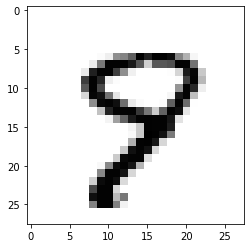

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)
tf.reset_default_graph() #변수 초기화
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, [None, 784])
x_img = tf.reshape(x, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
y = tf.placeholder(tf.float32, [None, 10])

# Layer1 ImgIn shape=(?, 28, 28, 1)
# Conv     -> (?, 28, 28, 32)
# Pool     -> (?, 14, 14, 32)
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
l1 = tf.nn.conv2d(x_img, w1, strides=[1, 1, 1, 1], padding='SAME')
l1 = tf.nn.relu(l1)
l1 = tf.nn.max_pool(l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
l1 = tf.nn.dropout(l1, keep_prob=keep_prob)
'''
Result:
After Conv2D:0, shape=(?, 28, 28, 32)
After Relu:0, shape=(?, 28, 28, 32)
After MaxPool:0, shape=(?, 14, 14, 32)
After dropout/mul:0, shape=(?, 14, 14, 32)
'''

# Layer 2 ImgIn shape=(?, 14, 14, 32)
# Conv      ->(?, 14, 14, 64)
# Pool      ->(?, 7, 7, 64)
w2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
l2 = tf.nn.conv2d(l1, w2, strides=[1, 1, 1, 1], padding='SAME')
l2 = tf.nn.relu(l2)
l2 = tf.nn.max_pool(l2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
l2 = tf.nn.dropout(l2, keep_prob=keep_prob)
'''
Result:
After Conv2D_1:0, shape=(?, 14, 14, 64)
After Relu_1:0, shape=(?, 14, 14, 64)
After MaxPool_1:0, shape=(?, 7, 7, 64)
After dropout_1/mul:0, shape=(?, 7, 7, 64)
'''

# Layer 3 ImgIn shape=(?, 7, 7, 64)
# Conv      ->(?, 7, 7, 128)
# Pool      ->(?, 4, 4, 128)
# Reshape   ->(?, 4 * 4 * 128)
w3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
l3 = tf.nn.conv2d(l2, w3, strides=[1, 1, 1, 1], padding='SAME')
l3 = tf.nn.relu(l3)
l3 = tf.nn.max_pool(l3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
l3 = tf.nn.dropout(l3, keep_prob=keep_prob)
l3_flat = tf.reshape(l3, [-1, 128 * 4 * 4])
'''
Result:
After Conv2D_2:0, shape=(?, 7, 7, 128)
After Relu_2:0, shape=(?, 7, 7, 128)
After MaxPool_2:0, shape=(?, 4, 4, 128)
After dropout_2/mul:0, shape=(?, 4, 4, 128)
After Reshape_1:0, shape=(?, 2048)
'''

# Layer 4 FC 4x4x128 inputs -> 625 outputs
w4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
l4 = tf.nn.relu(tf.matmul(l3_flat, w4) + b4)
l4 = tf.nn.dropout(l4, keep_prob=keep_prob)
'''
Result:
After Relu_3:0, shape=(?, 625)
After dropout_3/mul:0, shape=(?, 625)
'''

# L5 Final FC 625 inputs -> 10 outputs
w5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(l4, w5) + b5
'''
Result:
After add_1:0, shape=(?, 10), dtype=float32)
'''

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Finished')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()